## Assignment 2: $k$ Nearest Neighbor

### Do any four.

**Q1.** Please answer the following questions.
1. What is the difference between regression and classification?

- Regression and classification differ based on the type of outcome being predicted. Regression is used when the target variable is continuous, meaning the model predicts a numerical value, such as house price or temperature. Classification is used when the target variable is categorical, meaning the model predicts a class label, such as spam vs. not spam or whether a patient survives. In short, regression predicts numbers, while classification predicts categories.


2. What is a confusion table/matrix? What does it help us understand about a model's performance?

- A confusion matrix is a table that compares a model’s predicted class labels to the actual labels. It shows how many predictions were correct and how many were incorrect, broken down into categories like true positives, false positives, true negatives, and false negatives. It helps us understand not just overall accuracy, but also the types of errors the model makes, which can be important depending on the context.

3. What is Accuracy? Why might it not be entirely sufficient to evaluate a classifer's predictive performance?

- Accuracy is the proportion of predictions the model gets correct out of all predictions made. It is calculated as the number of correct predictions divided by the total number of observations. While accuracy is simple and intuitive, it can be misleading, especially when the classes are imbalanced. For example, if 95% of observations belong to one class, a model could predict that class every time and still have 95% accuracy, even though it completely fails to identify the minority class. Because of this, accuracy alone does not fully capture how well a classifier performs.

4. What does the root mean squared error quantify about a particular model?

- Root mean squared error (RMSE) measures the average magnitude of the errors in a regression model's predictions. It calculates the square root of the average squared differences between the predicted values and the actual values. RMSE tells us how far, on average, the model's predictions are from the true values, expressed in the same units as the target variable. A lower RMSE indicates better predictive performance.

5. What are overfitting and underfitting?

-Overfitting happens when a model fits the training data too closely, including noise or random variation. It performs well on the training set but poorly on new data. Underfitting is the opposite, the model is too simple and fails to capture the underlying pattern in the data. As a result, it performs poorly on both the training and test data. Ideally, a model should capture the true structure of the data without fitting random noise.

6. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or RMSE on the test set, improve model performance?

- Splitting the data allows performance to be evaluated on observations the model has not seen during training. If performance is only measured on the training set, the results can be overly optimistic. Selecting
k based on accuracy or RMSE from the test set helps identify the model that generalizes best to new data. This reduces the risk of overfitting and leads to more reliable predictions.

7. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

- Reporting a class label gives a clear and simple prediction, which is useful when a definite decision is required. However, it does not communicate how confident the model is in that prediction. Reporting a probability distribution provides more information about uncertainty. For example, a 55% probability and a 95% probability for the same class suggest very different levels of confidence. The drawback is that probabilities require choosing a threshold to convert them into final decisions, which introduces another layer of judgment.

**Q2.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.

1. Load the data. Perform some EDA, summarizing the target label and the relationships between the features (e.g. scatterplots, describe tables).
2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for your best model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?
5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.

In [4]:
! git clone https://github.com/Humzah-Syed/scratchpad
%run ./scratchpad/get_data.py

fatal: destination path 'scratchpad' already exists and is not an empty directory.


In [6]:
import pandas as pd

df = pd.read_csv('./data/land_mines.csv', encoding = 'latin1')

In [8]:
df.head()

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   voltage    338 non-null    float64
 1   height     338 non-null    float64
 2   soil       338 non-null    float64
 3   mine_type  338 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 10.7 KB


,voltage,height,soil,mine_type
count,338.000000,338.000000,338.000000,338.000000
mean,0.430634,0.508876,0.503550,2.952663
std,0.195819,0.306043,0.344244,1.419703
min,0.197734,0.000000,0.000000,1.000000
25%,0.309737,0.272727,0.200000,2.000000
50%,0.359516,0.545455,0.600000,3.000000
75%,0.482628,0.727273,0.800000,4.000000
max,0.999999,1.000000,1.000000,5.000000


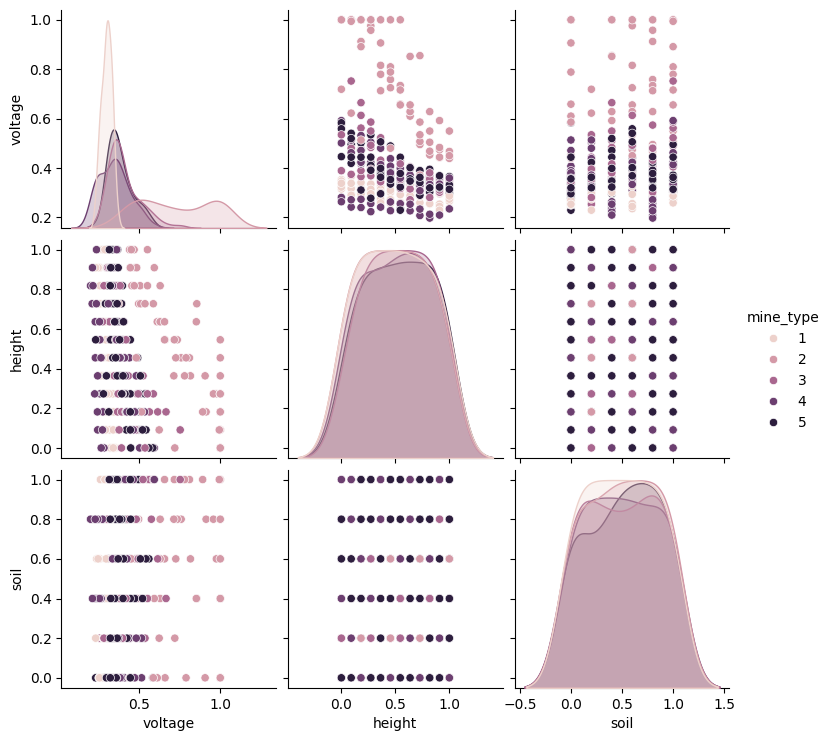

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df, hue="mine_type")
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

X = df[["voltage", "height", "soil"]]
y = df["mine_type"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42, stratify=y
)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

import numpy as np

k_values = range(1, 21)
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

best_k = k_values[np.argmax(accuracies)]
best_accuracy = max(accuracies)

best_k, best_accuracy

(2, 0.4378698224852071)

The dataset was split 50/50 into training and test sets to ensure enough observations in both sets, given the relatively small sample size. Stratification was used so that each mine type was proportionally represented in both splits. To select the optimal k, multiple values of k (from 1 to 20) were tested. For each value, a kNN classifier was trained on the training data and evaluated on the test data using accuracy. The value of k that produced the highest test accuracy was selected as the optimal number of neighbors. This approach helps balance overfitting (small k) and underfitting (large k) by choosing the value that generalizes best to unseen data.

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd

# Train final model with best k
final_model = KNeighborsClassifier(n_neighbors=best_k)
final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm,
                     index=["Actual 1","Actual 2","Actual 3","Actual 4","Actual 5"],
                     columns=["Pred 1","Pred 2","Pred 3","Pred 4","Pred 5"])

cm_df

,Pred 1,Pred 2,Pred 3,Pred 4,Pred 5
Actual 1,25,0,6,4,1
Actual 2,0,32,0,3,0
Actual 3,12,2,9,6,4
Actual 4,12,5,8,8,0
Actual 5,15,2,10,5,0


In [13]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.4378698224852071

The confusion matrix compares the predicted mine types to the actual mine types on the test set. The diagonal entries show the correct predictions, while the off diagonal entries show where the model makes mistakes. The overall accuracy is the proportion of correct predictions, but the confusion matrix shows that some mine types are classified more accurately than others. In particular, types that have similar feature values tend to be confused with each other.

Even if a mine type has many correct predictions, it can still have many mistakes if it appears frequently in the data. In practice, this model should not be used as the sole decision maker. Instead, it could be used as a support tool to narrow down likely mine types and guide caution, but final identification should rely on expert confirmation, especially since misclassification could have serious consequences.

**Q3.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for hyper-parameter selection and evaluation.
4. Use the $k$-NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [14]:
import pandas as pd

df = pd.read_csv("./data/USA_cars_datasets.csv", encoding = 'latin1')

df = df[["price", "year", "mileage"]]

df.head()
df.shape

(2499, 3)

In [16]:
df.isnull().sum()
df = df.dropna()

In [17]:
# Normalize year and mileage
df["year"] = (df["year"] - df["year"].min()) / (df["year"].max() - df["year"].min())
df["mileage"] = (df["mileage"] - df["mileage"].min()) / (df["mileage"].max() - df["mileage"].min())

df.head()

,price,year,mileage
0,6300,0.744681,0.269287
1,2899,0.808511,0.187194
2,5350,0.957447,0.038892
3,25000,0.872340,0.063016
4,27700,0.957447,0.006537


In [18]:
from sklearn.model_selection import train_test_split

X = df[["year", "mileage"]]
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

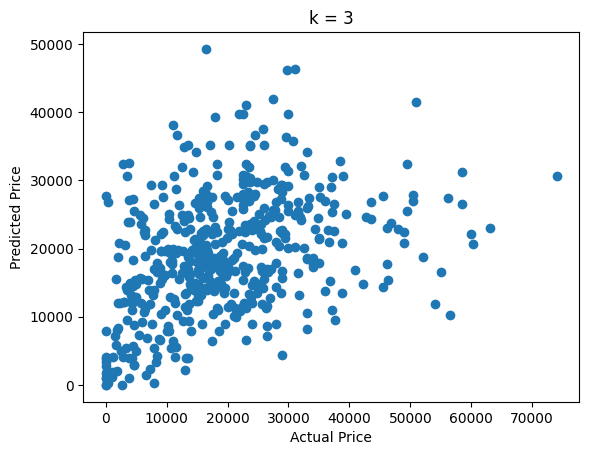

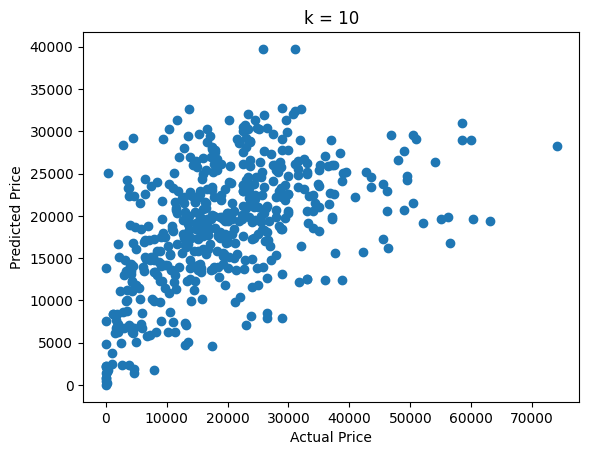

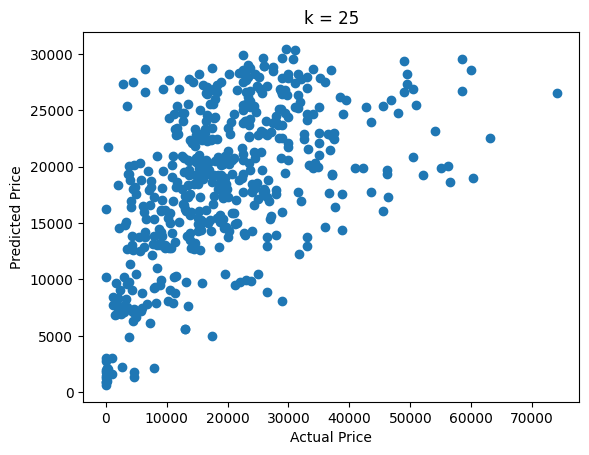

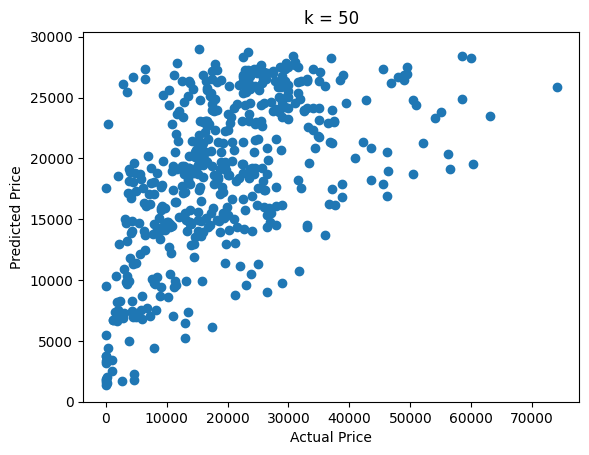

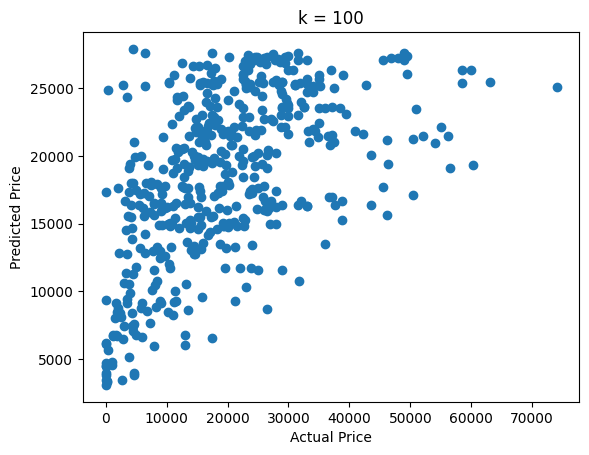

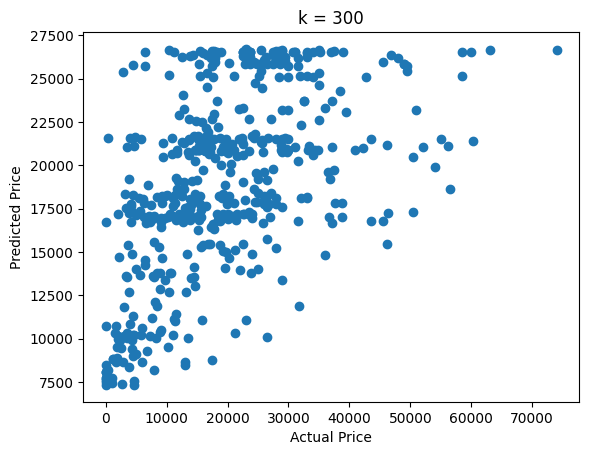

{3: 148065935.51955554,
 10: 117399126.10604002,
 25: 112576160.82390079,
 50: 110202549.3014296,
 100: 112253932.8184272,
 300: 114496301.82933456}

In [19]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

k_values = [3, 10, 25, 50, 100, 300]

mse_results = {}

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mse_results[k] = mse

    # Scatterplot
    plt.figure()
    plt.scatter(y_test, y_pred)
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(f"k = {k}")
    plt.show()

mse_results

The lowest test MSE occurs at k=50, so that is the optimal value for this dataset. It produces the best predictive performance among the tested values.

When k was small, especially at k = 3, the MSE was much higher. The scatterplot likely showed more variability and less stability in predictions. This suggests overfitting, since the model was relying on very few neighbors and reacting strongly to local noise.

As k increased to 25 and 50, the MSE decreased, and the predictions became more stable. Around k = 50, the model achieved the best balance between capturing structure in the data and smoothing out noise.

When k increased further to 100 and 300, the MSE started rising again. At very large k, the predictions tend to move closer to the overall mean price, reducing variation. This reflects underfitting, because the model is averaging across too many neighbors and losing meaningful detail in the relationship between year, mileage, and price.

**Q4.** This question is a case study for $k$ nearest neighbor regression, using the `heart_failure_clinical_records_dataset.csv` data.

The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$-NN classification or regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has the best Mean Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the RMSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

**Q5.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on.

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be. Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion matrix for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying proportions/probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

**Q6.** This is a case study using $k$ nearest neighbor regression for imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to column filter the dataframe to those variables.
2. Set use `.isnull()` and `.loc` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings.
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Describe what you see.

In [20]:
import pandas as pd

df = pd.read_csv("./data/airbnb_hw.csv", encoding = 'latin1')

df = df.loc[:, ["Review Scores Rating", "Price", "Beds"]]

df.head()
df.shape

(30478, 3)

In [39]:
df["Price"] = pd.to_numeric(
    df["Price"].astype(str).str.replace(",", "", regex=False),
    errors="coerce"
)

df["Beds"] = pd.to_numeric(df["Beds"], errors="coerce")

In [40]:
missing_ratings = df.loc[df["Review Scores Rating"].isnull()]
df_complete = df.dropna(axis=0, how="any")

In [41]:
missing_ratings = df.loc[df["Review Scores Rating"].isnull()]

df_complete = df.loc[~df["Review Scores Rating"].isnull()]

missing_ratings.shape
df_complete.shape

(22155, 3)

In [42]:
df_complete = df.dropna(axis=0, how='any')

df_complete.shape

(22111, 3)

In [43]:
from sklearn.model_selection import train_test_split

X = df_complete[["Price", "Beds"]]
y = df_complete["Review Scores Rating"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [44]:
df_complete = df.dropna(axis=0, how="any")

In [45]:
from sklearn.model_selection import train_test_split

X = df_complete[["Price", "Beds"]]
y = df_complete["Review Scores Rating"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [46]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

k_values = range(1, 31)
sse_results = {}

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    sse = mse * len(y_test)

    sse_results[k] = sse

best_k = min(sse_results, key=sse_results.get)
best_k

28

In [47]:
final_model = KNeighborsRegressor(n_neighbors=28)

X_full = df_complete[["Price", "Beds"]]
y_full = df_complete["Review Scores Rating"]

final_model.fit(X_full, y_full)

KNeighborsRegressor(n_neighbors=28)

In [52]:
X_missing = missing_ratings[["Price", "Beds"]]
X_missing_clean = X_missing.dropna()

predicted_ratings = final_model.predict(X_missing_clean)

missing_ratings.loc[X_missing_clean.index, "Predicted Rating"] = predicted_ratings

/tmp/ipython-input-3709020003.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_ratings.loc[X_missing_clean.index, "Predicted Rating"] = predicted_ratings


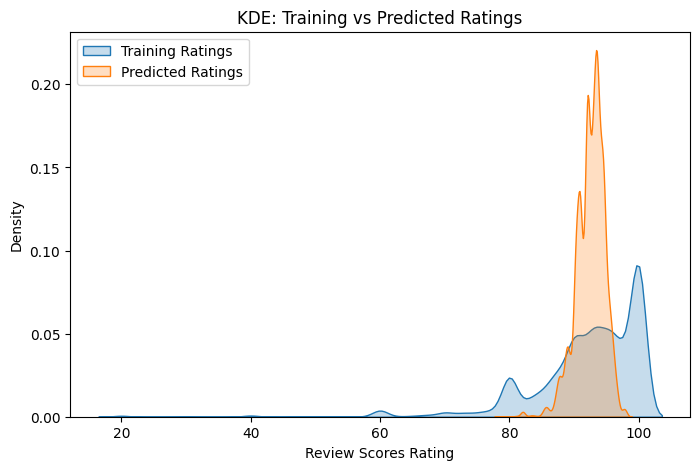

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

sns.kdeplot(df_complete["Review Scores Rating"], label="Training Ratings", fill=True)
sns.kdeplot(missing_ratings["Predicted Rating"].dropna(), label="Predicted Ratings", fill=True)

plt.legend()
plt.title("KDE: Training vs Predicted Ratings")
plt.show()

**Q7.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and use $k$-NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a list of matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set? Report the accuracy, compute a confusion matrix, and explain your findings.
6. For your confusion matrix, which mistakes are most likely? Do you find any interesting patterns?
7. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)